<a href="https://colab.research.google.com/github/Sagnik220/Forest-Fire-Prediction/blob/main/MLP_Classifier_Model_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [234]:
df=pd.read_csv('/content/forestfires.csv')

In [235]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [238]:
df['area'].value_counts()

0.00     247
1.94       3
3.71       2
0.90       2
1.95       2
        ... 
1.26       1
2.44       1
2.03       1
2.21       1
24.24      1
Name: area, Length: 251, dtype: int64

In [236]:
df.count()

X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      517
temp     517
RH       517
wind     517
rain     517
area     517
dtype: int64

In [244]:
df=df.drop(['X','Y','month','day'],axis=1)

In [245]:
def preprocessing(df,task):
  df=df.copy()
  if task=='Regression':
    Y=df['area']
  elif task=='Classification':
    Y=df['area'].apply(lambda x: 1 if x>0 else 0)

  X=df.drop('area',axis=1)

  X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.65,shuffle=False,random_state=0)

  scaler=StandardScaler()
  scaler.fit(X_train)

  X_train=pd.DataFrame(scaler.transform(X_train),columns=X.columns)
  X_test=pd.DataFrame(scaler.transform(X_test),columns=X.columns)

  return X_train,X_test,Y_train,Y_test

In [246]:
X_train,X_test,Y_train,Y_test=preprocessing(df,task='Classification')

In [247]:
X_train.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-0.851337,-1.497066,-1.741817,-0.786052,-1.853885,0.542042,1.488535,-0.073692
1,0.045241,-1.290273,0.604909,-0.449092,-0.028985,-0.591916,-1.703078,-0.073692
2,0.045241,-1.103710,0.677581,-0.449092,-0.662114,-0.591916,-1.482967,-0.073692
3,0.269386,-1.337476,-1.810406,0.035288,-1.835263,3.439935,0.002784,3.463542
4,-0.219657,-0.932881,-1.709563,0.161648,-1.257999,3.565930,-1.207828,-0.073692


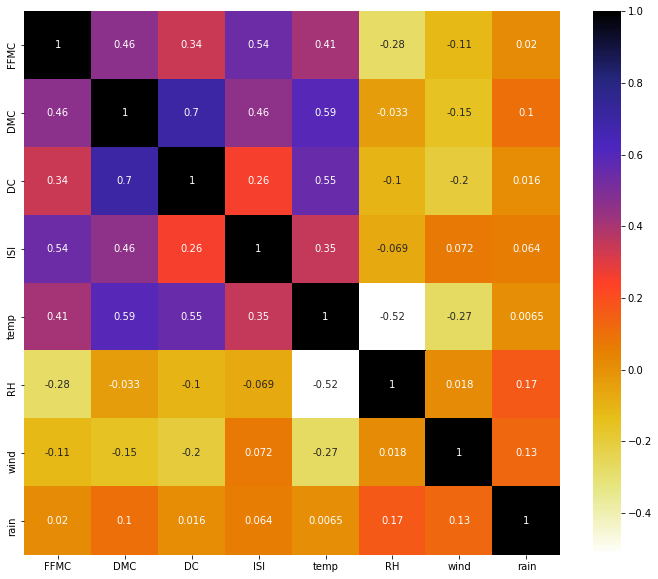

In [248]:
import seaborn as sns
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r )
plt.show()

In [249]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if(abs(corr_matrix.iloc[i,j])>threshold):
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [250]:
corr_features=correlation(X_train,0.7)
len(set(corr_features))

0

In [251]:
corr_features

set()

In [252]:
X_train.drop(corr_features,axis=1).head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-0.851337,-1.497066,-1.741817,-0.786052,-1.853885,0.542042,1.488535,-0.073692
1,0.045241,-1.290273,0.604909,-0.449092,-0.028985,-0.591916,-1.703078,-0.073692
2,0.045241,-1.103710,0.677581,-0.449092,-0.662114,-0.591916,-1.482967,-0.073692
3,0.269386,-1.337476,-1.810406,0.035288,-1.835263,3.439935,0.002784,3.463542
4,-0.219657,-0.932881,-1.709563,0.161648,-1.257999,3.565930,-1.207828,-0.073692


In [253]:
X_test.drop(corr_features,axis=1).head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.249009,0.350581,0.992355,-0.554392,0.213093,0.101059,-0.987716,-0.073692
1,0.249009,0.350581,0.992355,-0.554392,0.902086,-0.528918,-0.987716,-0.073692
2,0.249009,0.350581,0.992355,-0.554392,0.846222,-0.465920,-0.987716,-0.073692
3,0.249009,0.350581,0.992355,-0.554392,0.417929,-0.087934,-1.207828,-0.073692
4,0.249009,0.350581,0.992355,-0.554392,0.213093,0.101059,-0.987716,-0.073692


In [254]:
nn_classifier_model=MLPClassifier(activation='relu',hidden_layer_sizes=(16,16),n_iter_no_change=100,solver='adam')
nn_classifier_model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 16), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=100, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [255]:
print('MLP Classifier Accuracy, {:.5f}%'.format(nn_classifier_model.score(X_test,Y_test)*100))

MLP Classifier Accuracy, 50.82873%


In [256]:
nn_classifier_model.predict_proba(X_test[:10])

array([[0.57724435, 0.42275565],
       [0.67336303, 0.32663697],
       [0.66327232, 0.33672768],
       [0.58399674, 0.41600326],
       [0.57724435, 0.42275565],
       [0.52085341, 0.47914659],
       [0.43364496, 0.56635504],
       [0.63576475, 0.36423525],
       [0.76551969, 0.23448031],
       [0.42865212, 0.57134788]])

In [257]:
nn_classifier_model.predict(X_test[:10])

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [258]:
X_test[:10]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.249009,0.350581,0.992355,-0.554392,0.213093,0.101059,-0.987716,-0.073692
1,0.249009,0.350581,0.992355,-0.554392,0.902086,-0.528918,-0.987716,-0.073692
2,0.249009,0.350581,0.992355,-0.554392,0.846222,-0.465920,-0.987716,-0.073692
3,0.249009,0.350581,0.992355,-0.554392,0.417929,-0.087934,-1.207828,-0.073692
4,0.249009,0.350581,0.992355,-0.554392,0.213093,0.101059,-0.987716,-0.073692
5,0.310139,0.424757,1.018076,-0.491212,-0.457278,0.542042,-0.987716,-0.073692
6,0.228632,0.838342,1.168319,-0.280612,0.455172,-0.339925,-1.207828,-0.073692
7,0.228632,0.838342,1.168319,-0.280612,-0.420035,0.542042,0.277923,-0.073692
8,0.228632,0.838342,1.168319,-0.280612,-1.109028,1.487007,0.498034,-0.073692
9,0.228632,0.838342,1.168319,-0.280612,-0.252442,0.038061,-0.492466,-0.073692


In [219]:
Y_test[:10]

336    0
337    1
338    1
339    1
340    1
341    0
342    0
343    1
344    1
345    1
Name: area, dtype: int64

In [224]:
df_test['area'].value_counts()

0.00     247
1.94       3
3.71       2
0.90       2
1.95       2
        ... 
1.26       1
2.44       1
2.03       1
2.21       1
24.24      1
Name: area, Length: 251, dtype: int64

### Test to check:

In [261]:
nn_classifier_model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0])

In [262]:
np.array(Y_test)

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0])

In [263]:
Y_pred=nn_classifier_model.predict(X_test)
print('MLP Classifier Accuracy, {:.5f}%'.format(np.mean(Y_pred==Y_test)*100))

MLP Classifier Accuracy, 50.82873%
